# Introduction

**Objective:**
This project aims to classify images of food into one of ten distinct categories using both traditional and state-of-the-art (SOTA) deep learning models. The focus is on evaluating and comparing the performance of established Convolutional Neural Networks (CNNs) such as ResNet and Inception with more recent innovations like EfficientNet and Vision Transformers.

**Target Classes:**
The dataset includes images of the following food items:

- Pizza
- Steak
- Sushi
- Omelette
- Lasagna
- Ice Cream
- Ramen
- Tiramisu
- French Toast
- Apple Pie

Image classification has seen significant advancements with the development of deep learning models. Traditional CNNs, including ResNet and Inception, have long been the cornerstone of image classification tasks due to their ability to extract hierarchical features from images. ResNet introduces skip connections to address training difficulties in deeper networks, while Inception networks apply multi-scale convolutions to capture features at various resolutions.

In recent years, SOTA models like EfficientNet and Vision Transformers have emerged, pushing the boundaries of image classification. EfficientNet uses a compound scaling method to balance network depth, width, and resolution, resulting in highly efficient models with state-of-the-art performance. Vision Transformers, on the other hand, utilize self-attention mechanisms to capture complex dependencies across different regions of the image, offering a novel approach compared to traditional convolutional methods.


In [4]:
import torch
import torchvision


import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Setup data directory
import pathlib
data_dir = pathlib.Path("../data")

# Define a function to get the available device
def get_device():
    if torch.cuda.is_available():
        device = torch.device("cuda")
        print("Using GPU")
    else:
        device = torch.device("cpu")
        print("Using CPU")
    return device

In [5]:
# Get training data
import torchvision.datasets as datasets # Import datasets module
train_data = datasets.Food101(root=data_dir,
                              split="train",
                              # transform=transforms.ToTensor(),
                              download=True)

# Get testing data
test_data = datasets.Food101(root=data_dir,
                             split="test",
                             # transform=transforms.ToTensor(),
                             download=True)

100%|██████████| 4996278331/4996278331 [03:26<00:00, 24200031.86it/s]


Extracting ../data/food-101.tar.gz to ../data


In [ ]:
train_data


Dataset Food101
    Number of datapoints: 75750
    Root location: ../data
    split=train

In [6]:
import random
import pathlib

# Setup data paths
data_path = data_dir / "food-101" / "images"
target_classes = ["pizza", "steak", "sushi", "omelette", "lasagna", "ice_cream", "ramen", "tiramisu", "french_toast", "apple_pie"]

# Create function to gather all images for target classes
def get_all_images(image_path=data_path,
                   data_splits=["train", "test"],
                   target_classes=target_classes):
    label_splits = {}

    # Get labels
    for data_split in data_splits:
        print(f"[INFO] Creating image split for: {data_split}...")
        label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"  # Update this to your actual label path
        with open(label_path, "r") as f:
            labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]

        # Apply full paths
        image_paths = [pathlib.Path(str(image_path / label) + ".jpg") for label in labels]
        label_splits[data_split] = image_paths
    return label_splits

label_splits = get_all_images()

# Example to show a few image paths
for data_split in label_splits:
    print(f"\n{data_split} set sample paths:")
    for path in label_splits[data_split][:10]:
        print(path)


[INFO] Creating image split for: train...
[INFO] Creating image split for: test...

train set sample paths:
../data/food-101/images/apple_pie/1005649.jpg
../data/food-101/images/apple_pie/1014775.jpg
../data/food-101/images/apple_pie/1026328.jpg
../data/food-101/images/apple_pie/1028787.jpg
../data/food-101/images/apple_pie/1043283.jpg
../data/food-101/images/apple_pie/1050519.jpg
../data/food-101/images/apple_pie/1057749.jpg
../data/food-101/images/apple_pie/1057810.jpg
../data/food-101/images/apple_pie/1072416.jpg
../data/food-101/images/apple_pie/1074856.jpg

test set sample paths:
../data/food-101/images/apple_pie/1011328.jpg
../data/food-101/images/apple_pie/101251.jpg
../data/food-101/images/apple_pie/1034399.jpg
../data/food-101/images/apple_pie/103801.jpg
../data/food-101/images/apple_pie/1038694.jpg
../data/food-101/images/apple_pie/1047447.jpg
../data/food-101/images/apple_pie/1068632.jpg
../data/food-101/images/apple_pie/110043.jpg
../data/food-101/images/apple_pie/1106961.j

In [7]:
# Create target directory path
target_dir_name = f"../data/FOOD101"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: '../data/FOOD101'


In [8]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
[INFO] Copying ../data/food-101/images/ramen/3467204.jpg to ../data/FOOD101/train/ramen/3467204.jpg...
[INFO] Copying ../data/food-101/images/ramen/3468139.jpg to ../data/FOOD101/train/ramen/3468139.jpg...
[INFO] Copying ../data/food-101/images/ramen/3469273.jpg to ../data/FOOD101/train/ramen/3469273.jpg...
[INFO] Copying ../data/food-101/images/ramen/3483572.jpg to ../data/FOOD101/train/ramen/3483572.jpg...
[INFO] Copying ../data/food-101/images/ramen/3484140.jpg to ../data/FOOD101/train/ramen/3484140.jpg...
[INFO] Copying ../data/food-101/images/ramen/3485046.jpg to ../data/FOOD101/train/ramen/3485046.jpg...
[INFO] Copying ../data/food-101/images/ramen/348823.jpg to ../data/FOOD101/train/ramen/348823.jpg...
[INFO] Copying ../data/food-101/images/ramen/3488768.jpg to ../data/FOOD101/train/ramen/3488768.jpg...
[INFO] Copying ../data/food-101/images/ramen/3492554.jpg to ../data/FOOD101/train/ramen/3492554.jpg.

In [9]:
# Check lengths of directories
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(target_dir)

There are 2 directories and 0 images in '../data/FOOD101'.
There are 10 directories and 0 images in '../data/FOOD101/test'.
There are 0 directories and 250 images in '../data/FOOD101/test/ice_cream'.
There are 0 directories and 250 images in '../data/FOOD101/test/lasagna'.
There are 0 directories and 250 images in '../data/FOOD101/test/apple_pie'.
There are 0 directories and 250 images in '../data/FOOD101/test/tiramisu'.
There are 0 directories and 250 images in '../data/FOOD101/test/pizza'.
There are 0 directories and 250 images in '../data/FOOD101/test/french_toast'.
There are 0 directories and 250 images in '../data/FOOD101/test/steak'.
There are 0 directories and 250 images in '../data/FOOD101/test/omelette'.
There are 0 directories and 250 images in '../data/FOOD101/test/sushi'.
There are 0 directories and 250 images in '../data/FOOD101/test/ramen'.
There are 10 directories and 0 images in '../data/FOOD101/train'.
There are 0 directories and 750 images in '../data/FOOD101/train/ic

# Visualizing Sample Images from Different Classes



Displaying random images from train set:


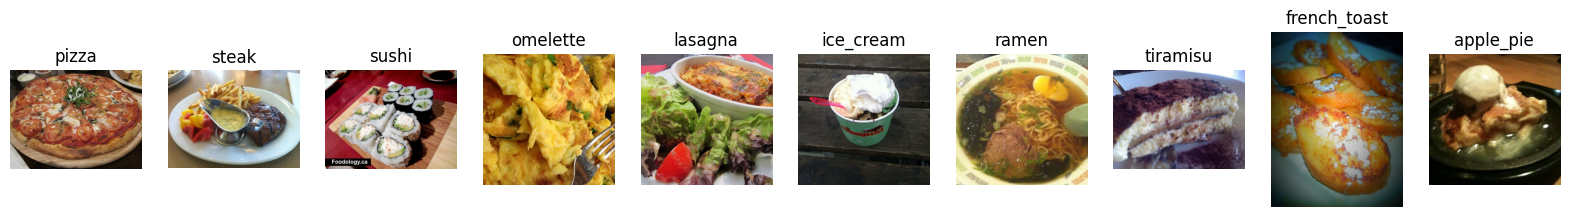


Displaying random images from test set:


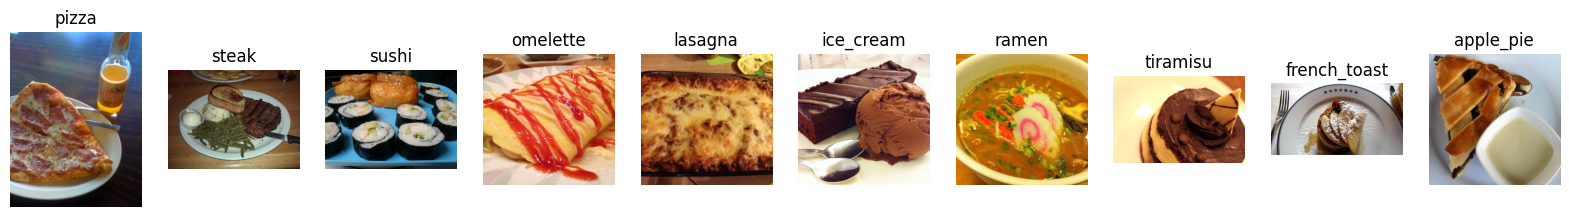

In [10]:
import random
import pathlib
from PIL import Image
import matplotlib.pyplot as plt

# Setup data paths
data_dir = pathlib.Path("../data/FOOD101")  # Update this to your actual data path
train_dir = data_dir / "train"
test_dir = data_dir / "test"
target_classes = ["pizza", "steak", "sushi", "omelette", "lasagna", "ice_cream", "ramen", "tiramisu", "french_toast", "apple_pie"]

# Create function to get random image paths from each class
def get_random_image_paths(base_dir, target_classes):
    random_image_paths = {}
    for target_class in target_classes:
        class_path = base_dir / target_class
        image_files = list(class_path.glob("*.jpg"))
        if image_files:
            random_image_paths[target_class] = random.choice(image_files)
        else:
            print(f"[WARNING] No images found for class: {target_class} in {base_dir}.")
    return random_image_paths

# Get random image paths from train and test directories
random_train_images = get_random_image_paths(train_dir, target_classes)
random_test_images = get_random_image_paths(test_dir, target_classes)

# Function to display images using matplotlib
def display_images(image_paths, data_split):
    print(f"\nDisplaying random images from {data_split} set:")
    num_images = len(image_paths)
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    for ax, (target_class, image_path) in zip(axes, image_paths.items()):
        img = Image.open(image_path)
        ax.imshow(img)
        ax.set_title(target_class)
        ax.axis('off')
    plt.show()

# Display random images
display_images(random_train_images, "train")
display_images(random_test_images, "test")


## Splitting the Data



In [11]:
train_dir = data_dir / "train"
test_dir = data_dir / "test"

In [12]:
import os
import shutil
import random
from pathlib import Path

# Define paths
train_dir = data_dir / "train"
test_dir = data_dir / "test"
output_dir = Path('path/to/output')

train_output_dir = output_dir / "train"
val_output_dir = output_dir / "val"
test_output_dir = output_dir / "test"

# Create directories for the new split data
os.makedirs(train_output_dir, exist_ok=True)
os.makedirs(val_output_dir, exist_ok=True)
os.makedirs(test_output_dir, exist_ok=True)

# Combine all images from the train and test directories
all_images = []
for dir_path in [train_dir, test_dir]:
    for class_name in os.listdir(dir_path):
        class_dir = dir_path / class_name
        if os.path.isdir(class_dir):
            images = list(class_dir.glob('*.jpg'))  # Adjust the pattern if your images have a different extension
            for img in images:
                all_images.append((img, class_name))

# Shuffle the combined list of images
random.shuffle(all_images)

# Calculate split indices
total_images = len(all_images)
train_split_idx = int(0.8 * total_images)
val_split_idx = int(0.9 * total_images)

# Split the images
train_images = all_images[:train_split_idx]
val_images = all_images[train_split_idx:val_split_idx]
test_images = all_images[val_split_idx:]

# Helper function to move images to the appropriate directory
def move_images(images, output_dir):
    for img_path, class_name in images:
        class_output_dir = output_dir / class_name
        os.makedirs(class_output_dir, exist_ok=True)
        shutil.move(str(img_path), class_output_dir / img_path.name)

# Move images to their respective directories
move_images(train_images, train_output_dir)
move_images(val_images, val_output_dir)
move_images(test_images, test_output_dir)

print('Splitting complete.')


Splitting complete.


In [13]:
import os

def count_images_in_directory(dir_path):
    class_counts = {}
    for root, dirs, files in os.walk(dir_path):
        if root == dir_path:
            continue
        class_name = os.path.basename(root)
        class_counts[class_name] = len(files)
    return class_counts

# Define paths
output_dir = 'path/to/output'
train_output_dir = os.path.join(output_dir, 'train')
val_output_dir = os.path.join(output_dir, 'val')
test_output_dir = os.path.join(output_dir, 'test')

# Count images
train_counts = count_images_in_directory(train_output_dir)
val_counts = count_images_in_directory(val_output_dir)
test_counts = count_images_in_directory(test_output_dir)

# Print counts
print('Train Directory Image Counts:')
for class_name, count in train_counts.items():
    print(f'{class_name}: {count} images')

print('\nValidation Directory Image Counts:')
for class_name, count in val_counts.items():
    print(f'{class_name}: {count} images')

print('\nTest Directory Image Counts:')
for class_name, count in test_counts.items():
    print(f'{class_name}: {count} images')


Train Directory Image Counts:
ice_cream: 822 images
lasagna: 781 images
apple_pie: 796 images
tiramisu: 795 images
pizza: 808 images
french_toast: 805 images
steak: 806 images
omelette: 800 images
sushi: 796 images
ramen: 791 images

Validation Directory Image Counts:
ice_cream: 87 images
lasagna: 106 images
apple_pie: 99 images
tiramisu: 97 images
pizza: 99 images
french_toast: 107 images
steak: 96 images
omelette: 105 images
sushi: 104 images
ramen: 100 images

Test Directory Image Counts:
ice_cream: 91 images
lasagna: 113 images
apple_pie: 105 images
tiramisu: 108 images
pizza: 93 images
french_toast: 88 images
steak: 98 images
omelette: 95 images
sushi: 100 images
ramen: 109 images


In [14]:
# Renamed variable names
train_dir = train_output_dir
val_dir = val_output_dir
test_dir = test_output_dir

# Example usage with renamed variables
print(f'Train Directory: {train_dir}')
print(f'Validation Directory: {val_dir}')
print(f'Test Directory: {test_dir}')

Train Directory: path/to/output/train
Validation Directory: path/to/output/val
Test Directory: path/to/output/test


# Creating DataLoaders for Train, Validation, and Test Sets


In [15]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = 2

def create_dataloaders(
    train_dir: str,
    val_dir: str,
    test_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int=NUM_WORKERS
):
    train_dataset = datasets.ImageFolder(train_dir, transform=transform)
    val_dataset = datasets.ImageFolder(val_dir, transform=transform)
    test_dataset = datasets.ImageFolder(test_dir, transform=transform)

    class_names = train_dataset.classes

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True,
    )

    return train_loader, val_loader, test_loader, class_names


In [16]:
# Paths to your data directories
train_dir = "path/to/output/train"
val_dir = "path/to/output/val"
test_dir = "path/to/output/test"

# Set batch size
batch_size = 32

# Create DataLoaders without any transformations
train_loader, val_loader, test_loader, class_names = create_dataloaders(
    train_dir=train_dir,
    val_dir=val_dir,
    test_dir=test_dir,
    transform=None,  # No transformation
    batch_size=batch_size,
    num_workers=NUM_WORKERS
)

# Verify the outputs
print(f"Class names: {class_names}")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")
print(f"Number of testing batches: {len(test_loader)}")


Class names: ['apple_pie', 'french_toast', 'ice_cream', 'lasagna', 'omelette', 'pizza', 'ramen', 'steak', 'sushi', 'tiramisu']
Number of training batches: 250
Number of validation batches: 32
Number of testing batches: 32


# Training and Evaluating the Model

In [17]:
import time
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

def train_and_evaluate_model(model, criterion, optimizer, scheduler, train_loader, val_loader, architecture=None, num_epochs=10):
    since = time.time()
    best_acc = 0.0

    # Save the initial model state
    torch.save(model.state_dict(), f"best_model_{architecture}.pth")

    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase, loader in [('train', train_loader), ('val', val_loader)]:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    if architecture.lower() == "inceptionv3":  # Handle InceptionV3 output
                        outputs, aux_outputs = model(inputs)
                        outputs = outputs  # Use the primary outputs for the main loss
                        # You might want to use aux_outputs for regularization
                    else:
                        outputs = model(inputs)

                    # Check if outputs is single-dimensional and add a dimension if needed
                    if len(outputs.shape) == 1:
                        outputs = outputs.unsqueeze(0)

                    _, preds = torch.max(outputs, 1)  # Calculate predictions

                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(loader.dataset)
            epoch_acc = running_corrects.double() / len(loader.dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                train_loss_history.append(epoch_loss)
                train_acc_history.append(epoch_acc.item())
            else:
                val_loss_history.append(epoch_loss)
                val_acc_history.append(epoch_acc.item())

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), f"best_model_{architecture}.pth")

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    model.load_state_dict(torch.load(f"best_model_{architecture}.pth"))

    # Plot training and validation loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_loss_history, label='Train Loss')
    plt.plot(range(num_epochs), val_loss_history, label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), train_acc_history, label='Train Accuracy')
    plt.plot(range(num_epochs), val_acc_history, label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.show()

    return model


In [20]:
def predict(model, dataloader, test_size):
    running_loss = 0.0
    running_corrects = 0
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        model.eval()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
    loss = running_loss / test_size
    acc = running_corrects.double() / test_size
    return loss, acc

#ResNet:

The main idea behind ResNet is to use residual blocks, which allows for the training of very deep networks while avoiding the problem of vanishing gradients. A residual block consists of two convolutional layers followed by a skip connection that adds the input to the outputs of the convolution layers. This means that the output of the residual block is the sum of the input and the learned residual which is the difference beween the input and the output of the convolutional layers. The skip connections allows for the output of one layer to be fed into a later layer effectively creating a shortcut in the network. By learning residuals the network can more easily optimize the wieghts of each layer, since it only needs to learn small adjustments to the output of each layer than completely re-learning the mapping from input to output. This enables the training of much deeper networks, which in turn can capture more complex features in the data.


We can think of our output as the F(x) + x, where F(x) is the output of our transformation and then x is the input just passed through earlier. When we're using a plain layer what we were trying to do is learn H(x), but it's hard to learn H(x) as we get very deep neural networks because of the vanishing gradients problem, so the idea here is this: Let's break it down instead of learning H(x) let's make H(x) = F(x) + x and just try to learn F(x) instead of learing H(x), we learn what is it we need to add or subtract from our input.

Full ResNet Architecture:

Stack residual blocks.
Every Residual block has 2 3x3 conv layers.
Periodically double nb. of filters and downsample spatially using stride 2.
Additional conv. layers at the beginning.
No FC layers at the end (Only FC 1000 to output classes) -> Global average pooling layer after last conv layer.
For deeper Networks (ResNet-50+) use "Bottleneck" layer to increas efficiency.


In [21]:
import torch
import torch.nn as nn
from torchvision import models, transforms
import torch.optim as optim
from torch.optim import lr_scheduler

# Check if a GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pretrained ResNet-50 model
model1 = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2).to(device)
model1.name = 'ResNet50_Model1'  # Assign a name to the model

# Get the transformations required for ResNet-50
resnet50_transforms = models.ResNet50_Weights.IMAGENET1K_V2.transforms()

# Create DataLoaders with the transformations
train_loader, val_loader, test_loader, class_names = create_dataloaders(
    train_dir=train_dir,
    val_dir=val_dir,
    test_dir=test_dir,
    transform=resnet50_transforms,  # Use the appropriate transformation
    batch_size=batch_size,
    num_workers=NUM_WORKERS
)

# Print the transforms to verify
print(resnet50_transforms)

# Freeze all model parameters
for param in model1.parameters():
    param.requires_grad = False

# Change the final layer to match the number of classes (10 in your case)
num_ftrs = model1.fc.in_features
model1.fc = nn.Linear(num_ftrs, 10)
model1 = model1.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.fc.parameters(), weight_decay=1e-4)  # Optimize only the final layer
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 187MB/s]


ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


Epoch 0/3
----------


100%|██████████| 250/250 [00:49<00:00,  5.02it/s]


train Loss: 1.3434 Acc: 0.6341


100%|██████████| 32/32 [00:05<00:00,  5.70it/s]


val Loss: 0.9222 Acc: 0.7470
Epoch 1/3
----------


100%|██████████| 250/250 [00:48<00:00,  5.18it/s]


train Loss: 0.8080 Acc: 0.7756


100%|██████████| 32/32 [00:06<00:00,  5.24it/s]


val Loss: 0.7334 Acc: 0.7890
Epoch 2/3
----------


100%|██████████| 250/250 [00:46<00:00,  5.33it/s]


train Loss: 0.6572 Acc: 0.8121


100%|██████████| 32/32 [00:06<00:00,  4.72it/s]


val Loss: 0.6584 Acc: 0.8070
Epoch 3/3
----------


100%|██████████| 250/250 [00:47<00:00,  5.31it/s]


train Loss: 0.5823 Acc: 0.8335


100%|██████████| 32/32 [00:06<00:00,  4.71it/s]


val Loss: 0.6532 Acc: 0.8160
Training complete in 3m 39s
Best val Acc: 0.8160


<ipython-input-17-37665a74312c>:83: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f"best_model_{architecture}.pth"))


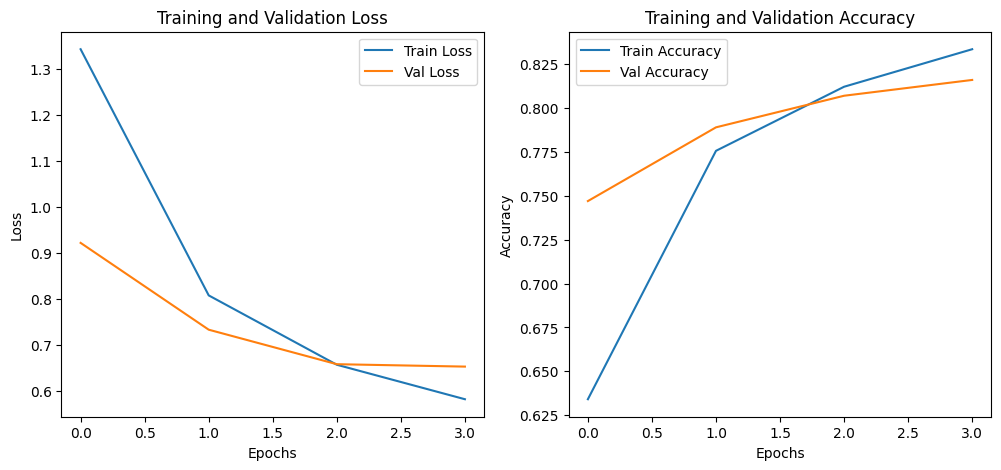

In [22]:
model1 = train_and_evaluate_model(model1, criterion, optimizer, exp_lr_scheduler,train_loader,val_loader, architecture="resnet50",
                       num_epochs=4)

In [23]:
# Assuming num_test is the number of samples in the test dataset
num_test = len(test_loader.dataset)

loss, acc = predict(model1, test_loader, num_test)
print('Loss on test {:.4f} :, Accuracy on test : {:.4f} '.format(loss,acc))

Loss on test 0.6986 :, Accuracy on test : 0.8090 


#  EfficientNet

Compound scaling is a unique approach used in EfficientNet to optimize the architecture's performance by simultaneously adjusting three key dimensions: depth, width, and resolution. Instead of scaling each dimension independently, which can lead to suboptimal configurations, EfficientNet employs a compound scaling formula that ensures a balanced increase across all three parameters.

### Key Components of Compound Scaling:

1. **Depth**: This refers to the number of layers in the network. Increasing the depth allows the model to learn more complex features but can also lead to diminishing returns if not done correctly.

2. **Width**: This represents the number of channels in each layer. Wider layers can capture more features but also increase computational costs.

3. **Input Resolution**: This is the size of the input images fed into the model. Higher resolutions can improve performance but may require more resources.

### The Scaling Strategy

The compound scaling approach applies a compound coefficient to each dimension, scaling them according to a specific ratio. This ensures that as the network's size increases, the balance among depth, width, and resolution is maintained, resulting in a more efficient architecture.

By using this method, EfficientNet achieves significant improvements in both accuracy and efficiency over previous architectures. The result is a family of models that can be fine-tuned for various resource constraints while still delivering state-of-the-art performance on tasks like image classification.

This strategic balance allows EfficientNet to outperform larger, more complex models while using fewer parameters, making it highly effective for practical applications in computer vision.


In [24]:
import torch
import torch.nn as nn
from torchvision import models, transforms
import torch.optim as optim
from torch.optim import lr_scheduler

# Check if a GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pretrained EfficientNet-B4 model
model3 = models.efficientnet_b4(weights=models.EfficientNet_B4_Weights.IMAGENET1K_V1).to(device)
model3.name = 'EfficientNetB4_Model3'  # Assign a name to the model

# Get the transformations required for EfficientNet-B4
efficientnet_b4_transforms = models.EfficientNet_B4_Weights.IMAGENET1K_V1.transforms()

# Create DataLoaders with the transformations for EfficientNet-B4
train_loader, val_loader, test_loader, class_names = create_dataloaders(
    train_dir=train_dir,
    val_dir=val_dir,
    test_dir=test_dir,
    transform=efficientnet_b4_transforms,  # Use EfficientNet-B4 transformations
    batch_size=batch_size,
    num_workers=NUM_WORKERS
)

# Print the transforms to verify
print(efficientnet_b4_transforms)

# Freeze all model parameters
for param in model3.parameters():
    param.requires_grad = False

# Change the final layer to match the number of classes (10 in your case)
num_ftrs = model3.classifier[1].in_features
model3.classifier[1] = nn.Linear(num_ftrs, 10)
model3 = model3.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.classifier[1].parameters(), weight_decay=1e-4)  # Optimize only the final layer
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# The rest of your training and evaluation code goes here


Downloading: "https://download.pytorch.org/models/efficientnet_b4_rwightman-23ab8bcd.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b4_rwightman-23ab8bcd.pth
100%|██████████| 74.5M/74.5M [00:01<00:00, 58.3MB/s]


ImageClassification(
    crop_size=[380]
    resize_size=[384]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)


Epoch 0/3
----------


100%|██████████| 250/250 [01:43<00:00,  2.42it/s]


train Loss: 1.6776 Acc: 0.6262


100%|██████████| 32/32 [00:12<00:00,  2.48it/s]


val Loss: 1.2425 Acc: 0.7480
Epoch 1/3
----------


100%|██████████| 250/250 [01:42<00:00,  2.45it/s]


train Loss: 1.0960 Acc: 0.7406


100%|██████████| 32/32 [00:12<00:00,  2.52it/s]


val Loss: 0.9455 Acc: 0.7720
Epoch 2/3
----------


100%|██████████| 250/250 [01:40<00:00,  2.48it/s]


train Loss: 0.9021 Acc: 0.7651


100%|██████████| 32/32 [00:12<00:00,  2.59it/s]


val Loss: 0.8110 Acc: 0.7840
Epoch 3/3
----------


100%|██████████| 250/250 [01:41<00:00,  2.47it/s]


train Loss: 0.8334 Acc: 0.7740


100%|██████████| 32/32 [00:12<00:00,  2.50it/s]


val Loss: 0.8003 Acc: 0.7900
Training complete in 7m 39s
Best val Acc: 0.7900


<ipython-input-17-37665a74312c>:83: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f"best_model_{architecture}.pth"))


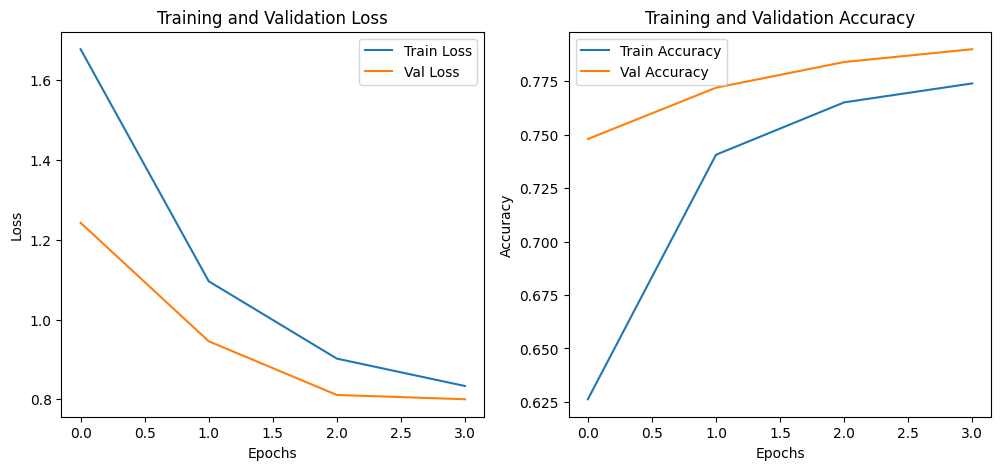

In [25]:
model3 = train_and_evaluate_model(model3, criterion, optimizer, exp_lr_scheduler,train_loader,val_loader, architecture="Efficienet",
                       num_epochs=4)

In [26]:
loss, acc = predict(model3, test_loader, num_test)
print('Loss on test {:.4f} :, Accuracy on test : {:.4f} '.format(loss,acc))


Loss on test 0.8137 :, Accuracy on test : 0.7830 


# Vision Transformer (ViT)

The Vision Transformer (ViT) is an innovative architecture that applies the transformer model, originally designed for natural language processing, to computer vision tasks. One of its key innovations is the use of self-attention mechanisms to process image patches rather than relying on traditional convolutional layers.

In ViT, images are divided into fixed-size patches, which are then flattened and linearly transformed into embeddings. This approach allows the model to focus on localized features. The self-attention mechanism enables ViT to capture global relationships between these patches, facilitating the learning of dependencies across the entire image. This capability is crucial for understanding complex visual information, as it allows the model to attend to relevant features regardless of their spatial locations.

The sequence of patch embeddings is processed through a series of transformer encoder layers, where multi-head self-attention and feed-forward neural networks work together to model intricate interactions between different parts of the image. Additionally, a special classification token is added to the sequence, which helps generate the final class prediction after processing.

By leveraging the transformer architecture, ViT effectively captures long-range dependencies and complex feature interactions, often outperforming traditional convolutional networks in image classification benchmarks, especially when trained on large datasets. Its flexibility and scalability make ViT a powerful tool in the field of computer vision, opening new avenues for research and applications.

In [27]:
import torch
import torch.nn as nn
from torchvision import models, transforms
import torch.optim as optim
from torch.optim import lr_scheduler

# Check if a GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pretrained Vision Transformer model
model4 = models.vit_b_16(weights=models.ViT_B_16_Weights.IMAGENET1K_V1).to(device)
model4.name = 'ViT_B_16_Model4'  # Assign a name to the model

# Get the transformations required for Vision Transformer
vit_b_16_transforms = models.ViT_B_16_Weights.IMAGENET1K_V1.transforms()

# Create DataLoaders with the transformations for Vision Transformer
train_loader, val_loader, test_loader, class_names = create_dataloaders(
    train_dir=train_dir,
    val_dir=val_dir,
    test_dir=test_dir,
    transform=vit_b_16_transforms,  # Use Vision Transformer transformations
    batch_size=batch_size,
    num_workers=NUM_WORKERS
)

# Print the transforms to verify
print(vit_b_16_transforms)

# Freeze all model parameters
for param in model4.parameters():
    param.requires_grad = False

# Change the final layer to match the number of classes (10 in your case)
num_ftrs = model4.heads.head.in_features  # Access the linear layer within 'heads'
model4.heads.head = nn.Linear(num_ftrs, 10)  # Replace the linear layer
model4 = model4.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model4.heads.head.parameters(), weight_decay=1e-4)  # Optimize only the final layer
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# The rest of your training and evaluation code goes here


ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


Epoch 0/4
----------


100%|██████████| 250/250 [01:49<00:00,  2.28it/s]


train Loss: 0.7026 Acc: 0.7873


100%|██████████| 32/32 [00:11<00:00,  2.72it/s]


val Loss: 0.4514 Acc: 0.8580
Epoch 1/4
----------


100%|██████████| 250/250 [01:49<00:00,  2.28it/s]


train Loss: 0.4260 Acc: 0.8630


100%|██████████| 32/32 [00:11<00:00,  2.67it/s]


val Loss: 0.3977 Acc: 0.8700
Epoch 2/4
----------


100%|██████████| 250/250 [01:49<00:00,  2.28it/s]


train Loss: 0.3593 Acc: 0.8865


100%|██████████| 32/32 [00:11<00:00,  2.74it/s]


val Loss: 0.3844 Acc: 0.8670
Epoch 3/4
----------


100%|██████████| 250/250 [01:49<00:00,  2.29it/s]


train Loss: 0.3090 Acc: 0.9065


100%|██████████| 32/32 [00:11<00:00,  2.75it/s]


val Loss: 0.3764 Acc: 0.8760
Epoch 4/4
----------


100%|██████████| 250/250 [01:49<00:00,  2.29it/s]


train Loss: 0.3032 Acc: 0.9074


100%|██████████| 32/32 [00:11<00:00,  2.68it/s]
<ipython-input-17-37665a74312c>:83: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f"best_mod

val Loss: 0.3743 Acc: 0.8760
Training complete in 10m 11s
Best val Acc: 0.8760


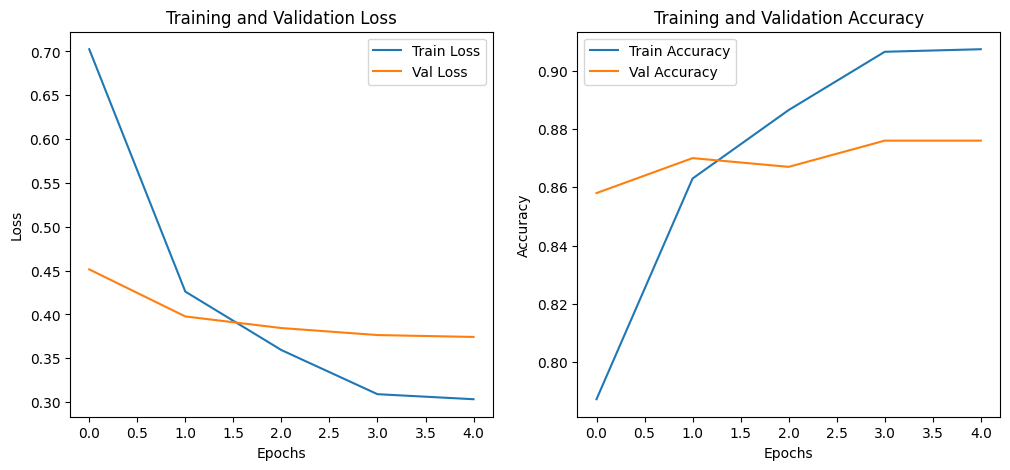

In [28]:
model4 = train_and_evaluate_model(model4, criterion, optimizer, exp_lr_scheduler,train_loader,val_loader, architecture="Vit",
                       num_epochs=5)

In [29]:
loss, acc = predict(model4, test_loader, num_test)
print('Loss on test {:.4f} :, Accuracy on test : {:.4f} '.format(loss,acc))



Loss on test 0.3668 :, Accuracy on test : 0.8770 


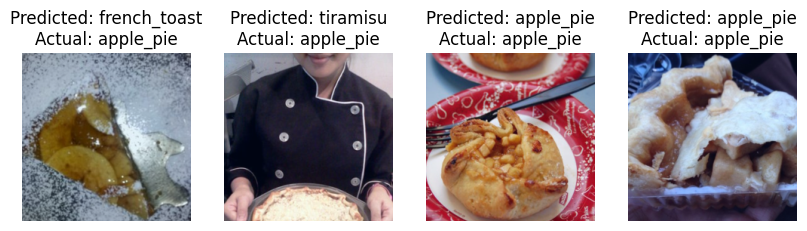

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(model, dataloader, class_names, num_images=4):
    model.eval()  # Set the model to evaluation mode
    images_so_far = 0
    fig = plt.figure(figsize=(10, 10))

    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)  # Get predicted labels

            # Convert the inputs (tensors) back to CPU for visualization
            for i in range(inputs.size(0)):
                if images_so_far == num_images:  # Stop when reaching the desired number of images
                    return
                images_so_far += 1

                ax = plt.subplot(1, num_images, images_so_far)
                ax.axis('off')
                ax.set_title(f"Predicted: {class_names[preds[i]]}\nActual: {class_names[labels[i]]}")

                # Convert the tensor to a numpy array for plotting
                img = inputs[i].cpu().numpy().transpose((1, 2, 0))  # Change from (C, H, W) to (H, W, C)

                # Normalize the image to [0, 1]
                img = (img - img.min()) / (img.max() - img.min())
                plt.imshow(img)

    plt.show()

# Now, use the function to plot predictions
plot_predictions(model4, test_loader, class_names, num_images=4)


## CNN

**Advantages:**
- Faster inference, efficient for real-time applications.
- Effective with smaller datasets.
- Easier to interpret with hierarchical feature extraction.

**Disadvantages:**
- Limited in capturing global context.
- Sensitive to architectural choices and hyperparameters.
- Prone to overfitting without regularization techniques.

---

## Vision Transformer (ViT)

**Advantages:**
- State-of-the-art performance with large datasets.
- Captures long-range dependencies through self-attention.
- Better generalization on complex tasks.
- High accuracy on various tasks.


**Disadvantages:**
- Slower inference due to computational complexity.
- Requires large amounts of data for optimal performance.
- Less interpretable than CNNs due to complex attention mechanisms.
